# AMOC sigma Plotting Routines
**Goal:** Produce timeseries plots for AMOC(sigma)  
**Date:** April 2023  
**Creator:** Teagan King, adapted from Fred Castruccio's notebook

In [1]:
%load_ext autoreload
%autoreload 2

import xarray as xr 
import numpy as np  
import cftime
import datetime
import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.units as munits
from matplotlib.dates import ConciseDateConverter
munits.registry[cftime.DatetimeNoLeap] = ConciseDateConverter()
munits.registry[cftime.datetime] = ConciseDateConverter()
import matplotlib.ticker as mticker
%matplotlib inline

In [2]:
mocf = '/glade/scratch/tking/MOCsig/B.E.13.BRCP85C5CN.ne120_t12.sehires38.003.sunway.CN_OFF.pop.h.MOCsig.*.nc'

ds1 = xr.open_mfdataset(mocf,
                       combine="nested",  # combine files in order provided
                       concat_dim="time",  # concatentate files along time dimension
                       data_vars="minimal",  # only concatentate data variables with "time" dimension
                       coords="minimal",  # same as above for coordinate variables
                       compat="override",
                       chunks={"time": 1}, # choose simple
                      )

yamoc_rcp85_1 = ds1.MOC.isel(transport_reg=1).sel(lat_aux_grid=26.5, method="nearest").max('sigma')

In [3]:
mocf = '/glade/campaign/collections/cmip/CMIP6/iHESP/BRCP85/HR/b.e13.BRCP85C5.ne120_t12.cesm-ihesp-hires1.0.30.002/ocn/proc/tseries/month_1/b.e13.BRCP85C5.ne120_t12.cesm-ihesp-hires1.0.30.002.pop.h.MOCsig.*.nc'

ds2 = xr.open_mfdataset(mocf,
                        combine="nested",  # combine files in order provided
                        concat_dim="time",  # concatentate files along time dimension
                        data_vars="minimal",  # only concatentate data variables with "time" dimension
                        coords="minimal",  # same as above for coordinate variables
                        compat="override",
                        chunks={"time": 1}, # choose simple
                       )
xamoc = ds2['time']

yamoc_rcp85_2 = ds2.MOC.isel(transport_reg=1).sel(lat_aux_grid=26.5, method="nearest").max('sigma')

In [4]:
mocf = '/glade/campaign/collections/cmip/CMIP6/iHESP/BRCP85/HR/b.e13.BRCP85C5.ne120_t12.cesm-ihesp-hires1.0.31.003/ocn/proc/tseries/month_1/b.e13.BRCP85C5.ne120_t12.cesm-ihesp-hires1.0.31.003.pop.h.MOCsig.*.nc'

ds3 = xr.open_mfdataset(mocf,
                        combine="nested",  # combine files in order provided
                        concat_dim="time",  # concatentate files along time dimension
                        data_vars="minimal",  # only concatentate data variables with "time" dimension
                        coords="minimal",  # same as above for coordinate variables
                        compat="override",
                        chunks={"time": 1}, # choose simple
                       )

yamoc_rcp85_3 = ds3.MOC.isel(transport_reg=1).sel(lat_aux_grid=26.5, method="nearest").max('sigma')

In [5]:
mocf = '/glade/campaign/collections/cmip/CMIP6/iHESP/BRCP45/HR/b.e13.BRCP45C5.ne120_t12.cesm-ihesp-hires1.0.42.003/ocn/proc/tseries/month_1/b.e13.BRCP45C5.ne120_t12.cesm-ihesp-hires1.0.42.003.pop.h.MOCsig.*.nc'

ds4 = xr.open_mfdataset(mocf,
                       combine="nested",  # combine files in order provided
                       concat_dim="time",  # concatentate files along time dimension
                       data_vars="minimal",  # only concatentate data variables with "time" dimension
                       coords="minimal",  # same as above for coordinate variables
                       compat="override",
                       chunks={"time": 1}, # choose simple
                      )

yamoc_rcp45_1 = ds4.MOC.isel(transport_reg=1).sel(lat_aux_grid=26.5, method="nearest").max('sigma')

In [6]:
mocf = '/glade/campaign/collections/cmip/CMIP6/iHESP/BRCP26/HR/b.e13.BRCP26C5.ne120_t12.cesm-ihesp-hires1.0.42.003/ocn/proc/tseries/month_1/b.e13.BRCP26C5.ne120_t12.cesm-ihesp-hires1.0.42.003.pop.h.MOCsig.*.nc'

ds5 = xr.open_mfdataset(mocf,
                       combine="nested",  # combine files in order provided
                       concat_dim="time",  # concatentate files along time dimension
                       data_vars="minimal",  # only concatentate data variables with "time" dimension
                       coords="minimal",  # same as above for coordinate variables
                       compat="override",
                       chunks={"time": 1}, # choose simple
                      )
yamoc_rcp26_1 = ds5.MOC.isel(transport_reg=1).sel(lat_aux_grid=26.5, method="nearest").max('sigma')

In [10]:
mocf = '/glade/scratch/tking/MOCsig/b.e13.BRCP60C5.ne120_t12.cesm-ihesp-hires1.0.44.003.pop.h.MOCsig.*.nc'

ds6 = xr.open_mfdataset(mocf,
                       combine="nested",  # combine files in order provided
                       concat_dim="time",  # concatentate files along time dimension
                       data_vars="minimal",  # only concatentate data variables with "time" dimension
                       coords="minimal",  # same as above for coordinate variables
                       compat="override",
                       chunks={"time": 1}, # choose simple
                      )
yamoc_rcp60_1 = ds6.MOC.isel(transport_reg=1).sel(lat_aux_grid=26.5, method="nearest").max('sigma')

In [11]:
# perform average of RCP 8.5 scenarios
yamoc_rcp85 = (yamoc_rcp85_1 + yamoc_rcp85_2 + yamoc_rcp85_3) / 3.

/glade/u/home/tking/.conda/envs/ipogs/lib/python3.10/site-packages/dask/array/reductions.py:608: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


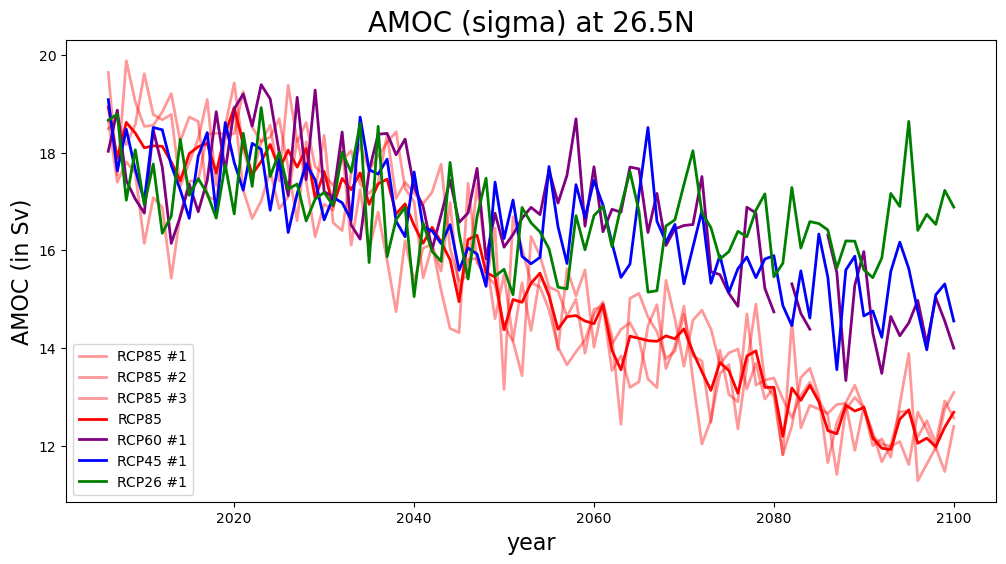

In [12]:
# generate plot
plt.figure(figsize=(12,6))
plt.plot(xamoc, yamoc_rcp85_1[:-1], label='RCP85 #1', color='red', alpha=0.4, lw=2)
plt.plot(xamoc, yamoc_rcp85_2, label='RCP85 #2', color='red', alpha=0.4, lw=2)
plt.plot(xamoc, yamoc_rcp85_3, label='RCP85 #3', color='red', alpha=0.4, lw=2)
plt.plot(xamoc, yamoc_rcp85, label='RCP85', color='red', lw=2)
plt.plot(xamoc, yamoc_rcp60_1, label='RCP60 #1', color='purple', lw=2)
plt.plot(xamoc, yamoc_rcp45_1, label='RCP45 #1', color='blue', lw=2)
plt.plot(xamoc, yamoc_rcp26_1, label='RCP26 #1', color='green', lw=2)
plt.legend()
plt.title('AMOC (sigma) at 26.5N', fontsize=20)
plt.xlabel('year', fontsize=16)
plt.ylabel('AMOC (in Sv)', fontsize=16)
plt.savefig('AMOCsig_26_5_ts_RCPs.png', dpi=300, facecolor='w', edgecolor='w', orientation='portrait')